# Introduction to the Julia language

This tutorial will start exploring the basic concepts of Julia:
* Creation of variables.
* Basic algebraic operations with variables.
* Definition of functions.
* Handling of arrays and matrices.
* Basic software concepts in Julia:
    * *if ... else* statements.
    * *for* loops.
    * *while* loops.
    
All the commands shown here can be run also in Visual Studio Code with the Julia extension.

If in doubt, please consult the Julia manual and tutorials at this link: https://docs.julialang.org/en/v1/manual/getting-started/.

## 0 - Julia interface on VSCode

This section will present some basics concepts on how to use Julia. All the screenshots are taken from the Visual Studio Code IDE, but the concepts can be applied also here on Jupyter Notebook or from the Julia terminal.

### REPL

Julia REPL (Read Eval Print Loop) works as a Terminal. All the commands that can be used in a script or in Jupyter, can be used there.

Make sure that in the list of terminals, the active one is called "*Julia REPL (v1.9.2)*" and that in the window you can see "`julia>`".

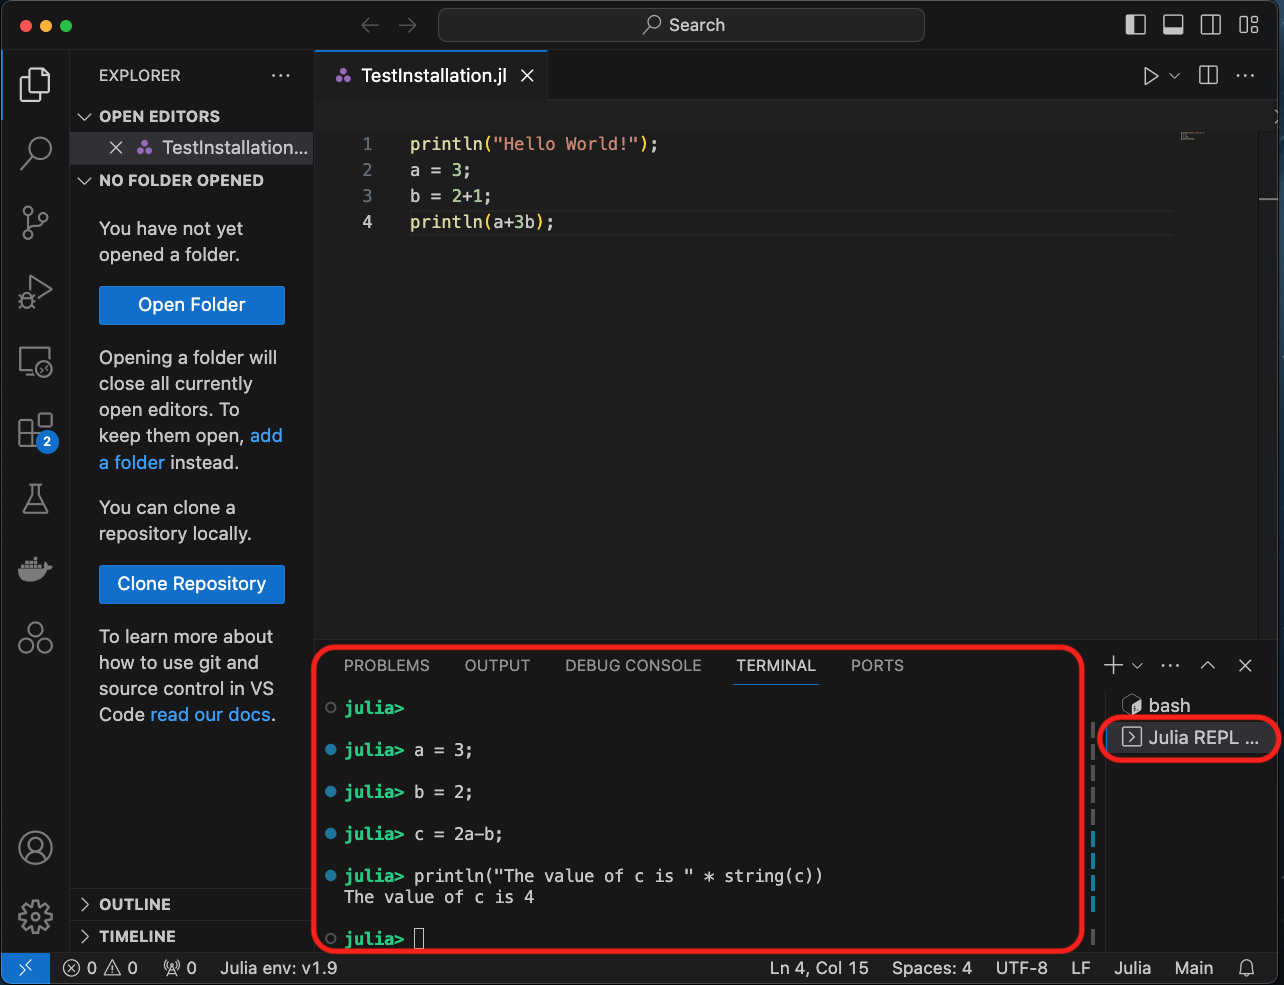

### Script execution

Scripts can be written in the IDE as any other language.  
A semicolon ('`;`') can be used to condense multiple lines in one, but it is not necessary.
A script always outputs in the terminal the output of the last line without a semicolon, but only if the code does not contain any *print* statement.

Comments can be made in the code.  
Single lines of code begin with the pound sign ('`#`').
Multiple lines of code have to be included between '`#=`' and '`=#`'.

In [1]:
#= This is
a multi-line
comment. =#
a = 3;
b = 2

# Only the output of the second line will be displayed.

2

To execute a script use the Run button in the top-right corner.  
Make sure that you have saved the script at least once with a "`.jl`" extension before execution.

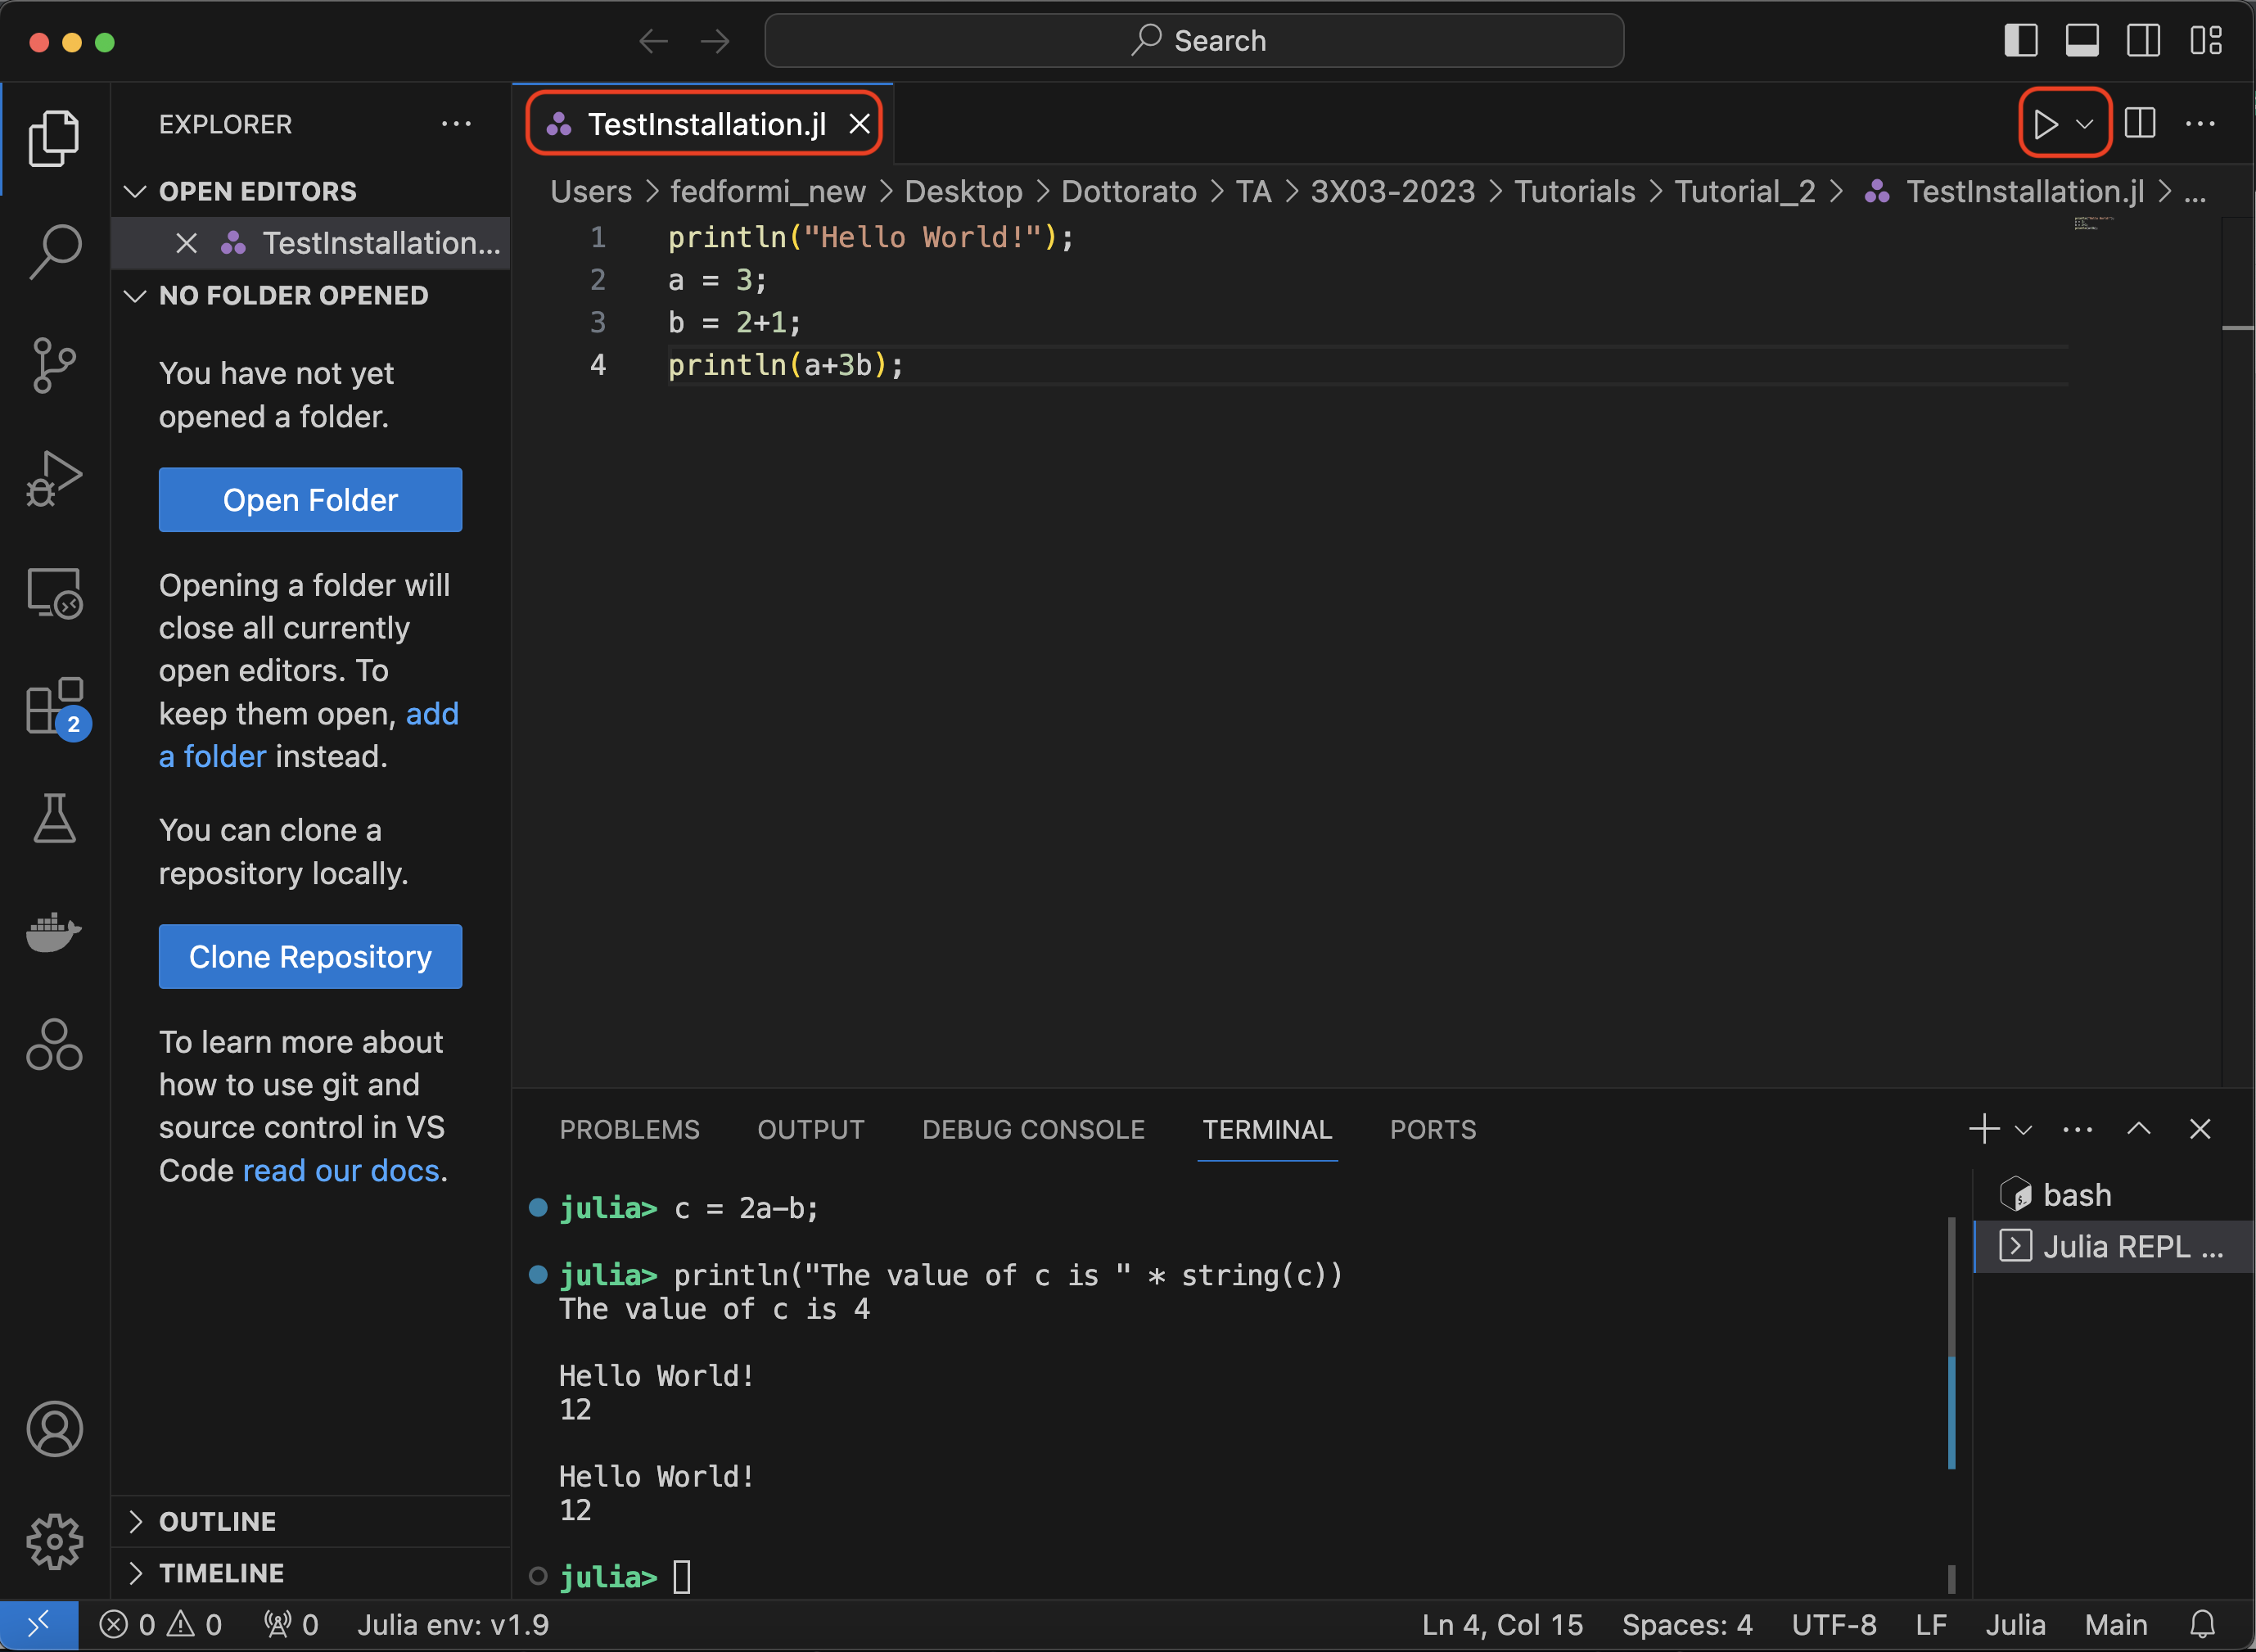

### Package manager

As explained in the last tutorial, to enter Package Mode use a closed square bracket ('`]`') in the REPL.  
To add a package, use the command: "`add <PackageName>`".  

Please install the following packages:
* LinearAlgebra
* Random
* Plots

To check which packages have been installed, you can use the "`status`" command in Package Mode.

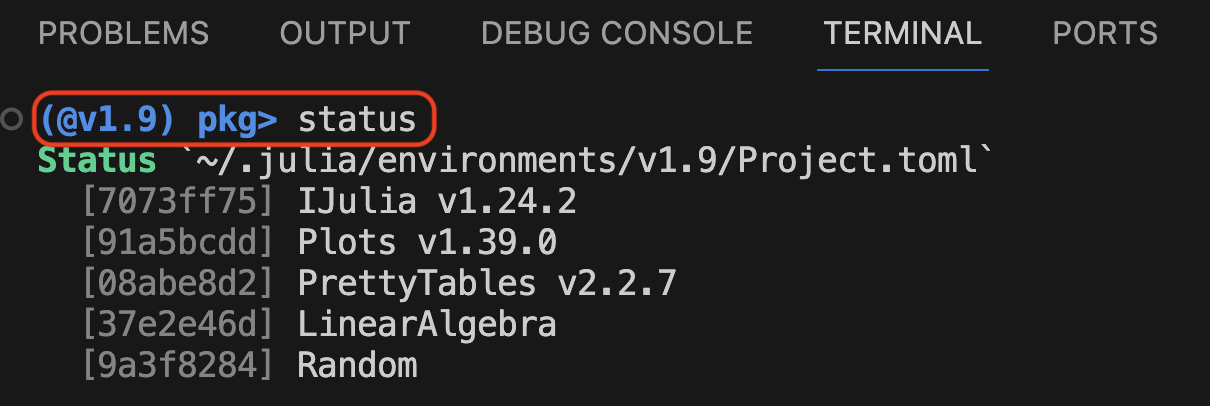

In [2]:
] status

Status `~/.julia/environments/v1.9/Project.toml`
  [7073ff75] IJulia v1.24.2
  [91a5bcdd] Plots v1.39.0
  [08abe8d2] PrettyTables v2.2.7
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random


**Note**: Differently from Help Mode, Package Mode is not exited automatically after each call.
Use backspace to delete the invisible square bracket.

There are two different ways to load a Package:
* "`using`": it loads all the functions and variables defined in the module.
* "`import`": it loads the name of the module only, but no functions are directly available. They have to be called using the module name (it recognises the keyword "`as`" to rename a module, like Python).  

To make a comparison, "`import`" works the same as Python, while "`using`" is equivalent to "`from X import *`" in Python or "`using namespace X`" in C++.

In [3]:
import LinearAlgebra as linalg

A = [3 -1; 2 4];
d = linalg.det(A);
println("The determinant of the matrix A is " * string(d))

The determinant of the matrix A is 14.0


In [4]:
using LinearAlgebra

d = det(A);
println("The determinant of the matrix A is " * string(d))

The determinant of the matrix A is 14.0


### Help function

A complete description of each function is present on the Julia official documentation.
A faster alternative is to use the Help Mode directly from the Julia interface. To access this mode is sufficient to preface the name of a function or special keyword with a question mark ('`?`').  
This works both in a script and on the REPL.

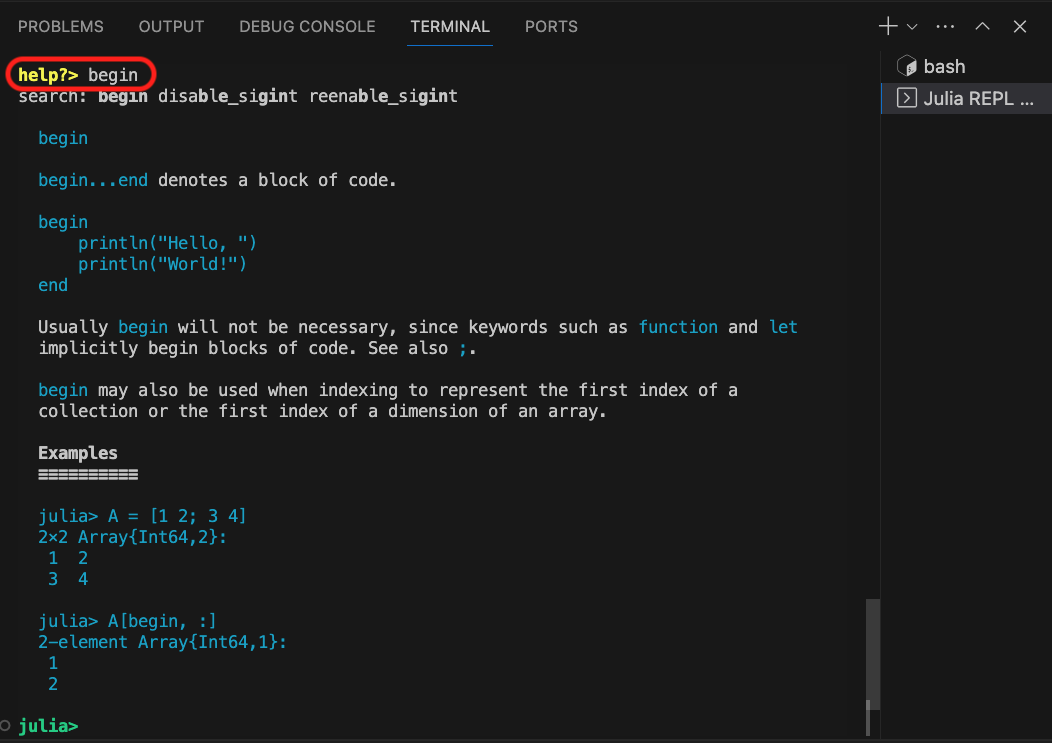

In [5]:
? begin

search: begin disable_sigint reenable_sigint



```
begin
```

`begin...end` denotes a block of code.

```julia
begin
    println("Hello, ")
    println("World!")
end
```

Usually `begin` will not be necessary, since keywords such as [`function`](@ref) and [`let`](@ref) implicitly begin blocks of code. See also [`;`](@ref).

`begin` may also be used when indexing to represent the first index of a collection or the first index of a dimension of an array.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> A[begin, :]
2-element Array{Int64,1}:
 1
 2
```


## 1 - "Hello World" program

Use this simple program to test if the Julia extension has been correctly installed on Visual Studio Code and Jupyter Notebook.

A string can be displayed by simply writing it between double quotation marks: '`"   "`'.

In [6]:
"Hello World!"

"Hello World!"

The same result is obtained by creating a string variable with no semicolon ('`;`') at the end.

In [7]:
testString = "Hello World!"

"Hello World!"

A more clean and refined approach is to use the `print` and `println` functions. These two functions work very similarly, but `println` adds a newline character at the end of each string.

In [8]:
print(testString);
print("Hello World!");
print(testString);

print("\n\n");

println(testString);
println("Hello World!");
println(testString);

Hello World!Hello World!Hello World!

Hello World!
Hello World!
Hello World!


## 2 - Variables

### Creating variables
Variables can be easily created in Julia, using a syntax similar to Python and Matlab. There is no need to pre-define the type of all variables, since Julia's type system is dynamic.

In [9]:
a = 3;
println("The variable 'a' is of type " * string(typeof(a)));

b = 2.50;
a = b;
println("The variable 'a' is of type " * string(typeof(a)));

The variable 'a' is of type Int64
The variable 'a' is of type Float64


### Numeric types

Julia recognises many data types for Integers (e.g., `Int32`, `UInt16`) and Floating-Point Integers (e.g., `Float16`,`Float32`).
If not specified, Julia uses the default integer and float type of the system.  
The command "`typeof`" allows to show the type of each variable.

In [10]:
a = 12;
println("The default type for integers on this system is " * string(typeof(a)));

b = 3.075;
println("The default type for floats on this system is " * string(typeof(b)));

The default type for integers on this system is Int64
The default type for floats on this system is Float64


Julia also recognizes the "e-notation" for numbers in scientific notation and uses the system default type of floating-point numbers.

In [11]:
a = 7.34e-3;
println(a);

b = 17e4;
println(b);

0.00734
170000.0


The type of a variable can be converted using three different methods:
* the `convert` function.
* using the type-specific function.
* casting as notation ("`::`").

In [12]:
A = 35;
println("The variable A is of type " * string(typeof(A)));

a1 = convert(Int8,A);
println("The variable a1 is of type " * string(typeof(a1)));

a2 = UInt16(A);
println("The variable a2 is of type " * string(typeof(a2)));

a3::Int32 = A;
println("The variable a3 is of type " * string(typeof(a3)));

The variable A is of type Int64
The variable a1 is of type Int8
The variable a2 is of type UInt16
The variable a3 is of type Int32


### Special numerical entities

Julia allows to define some special numerical entities:
* `NaN`: Not a Number, invalid number token. By default, it is of type *Float64*, but it can be casted for single and half precision floats using respectively "`NaN32`" and "`NaN16`".
* `Inf`: Token value greater than all the finite floating-point value. By default, it is of type *Float64*, but it can be casted for single and half precision floats using respectively "`Inf32`" and "`Inf16`".
* `eps`: Machine precision. It returns the distance between the argument and the following floating-point number. If no argument is provided, it uses 1.0.

In [13]:
println("Comparison with NaN: " * string(3.0 != NaN));
println("Comparison with infinity: " * string(7.53 >= -Inf));
println("Machine precision around 1.0 for Float64: " * string(eps()));

x::Float32 = 5.3;
println("Machine precision around 5.3 for Float32: " * string(eps(x)));

Comparison with NaN: true
Comparison with infinity: true
Machine precision around 1.0 for Float64: 2.220446049250313e-16
Machine precision around 5.3 for Float32: 4.7683716e-7


### Complex and imaginary numbers

Julia allows the creation of complex numbers using the keyword "`im`", that represents the imaginary unit.  
There is no difference in the way the algebraic and arithmetic operations are called for complex numbers.

In [14]:
a = 17+5*im;
b = -13+4im;
println("The sum result is a + b = " * string(a+b));

The sum result is a + b = 4 + 9im


**Note**: Julia will throw an error when trying to compute the square root of a negative number, unless it is of type Complex.

In [15]:
try
    sqrt(-9);
catch
    println("Invalid operation!");
end
println("The square root of -9 is " * string(sqrt(Complex(-9))));

Invalid operation!
The square root of -9 is 0.0 + 3.0im


### Rational numbers

If a number has a rational representation, it can be treated as such (removing roundings as a source of error).  
Numbers are saved as rational by using the double backslash symbol ('`//`').

In [16]:
a = 1//2;
b = 2//3;
println(string(a+b));

7//6


### Other types

In addition to numbers (integers and floats), the following types may be useful:
* *Char*: Single character included between single quotation marks '`'   '`'.
* *String*: One or more characters included between double quotation marks '`"   "`'.
* *Boolean*: It is equal to either '`true`' or '`false`'.

**Note**: The special keywords `true` and `false` are written all lowercase (similar to Matlab or C++, different from Python).

In [17]:
a = 'd';
println("The type of 'a' is " * string(typeof(a)) * ".");

b = "RandomString";
println("The type of 'b' is " * string(typeof(b)) * ".");

c = true;
println("The type of 'c' is " * string(typeof(c)) * ".");

The type of 'a' is Char.
The type of 'b' is String.
The type of 'c' is Bool.


### Deleting variables
There is no way to completely delete variables from an active session in Julia after they were defined. It is possible to use the keyword '`nothing`' to empty a variable and release the memory occupied (but the variable name will still be recognized as a valid variable name).

In [18]:
a = 17e20;
println(a);

a = nothing;
println(a);

1.7e21
nothing


### Arithmetic operations on scalars

All arithmetic operations on scalar quantities can be easily executed using the standard operators: +, -, \*, and /. If a variable is multiplied by a number (e.g., "`3x`"), it's also possible to remove the multiplcation symbol.  
Exponentiation is performed using the power operator '`^`'.  
The remainder operation is performed using either the percentage symbol ('`%`') or the "`rem`" function.

In [19]:
a = 2;
b = 3;
c = 7;

println(((2a+3b^2)-a*c)/3);
println(7%3)

5.666666666666667
1


Julia does **not** support the unit increment and decrement operators (e.g., `i++`) like C++ or Python.  
On the other hand, it supports the update operators: '`+=`' and '`-=`'.

In [20]:
a += 3;
println(a);

a -= 0.3;
println(a);

5
4.7


## 3 - Functions

### Creating elementary functions

Julia allows users to create custom functions using the keyword "`function`".
Each call to "`function`" requires an "`end`" at the bottom.  
A function declaration requires a name for the function and a list of input arguments (it is not necessary to provide the typying).

In [21]:
function functionName(a,b)
    a^2+2b;
end

functionName(2,5)

14

A function can return multiple output arguments in the form of a *tuple*:

In [22]:
function multipleOutputs(a,b)
    a*b, a/b;
end

println(multipleOutputs(8,2));

(x,y) = multipleOutputs(9,3);
println("The outputs of the function are " * string(x) * " and " * string(y));

(16, 4.0)
The outputs of the function are 27.0 and 3.0


### Use `return` keyword

A function automatically returns the output/outputs of the last line.
For readability purposes, it is advisable to use the "`return`" keyword to specify exactly what is the function output. When a function encounters an instance of "`return`", it gets interrupted and returns the values specified (i.e., it ignores the rest of the function body).

In [23]:
function dualmax(a,b)
    if a > b
        return a;
    else
        return b;
    end
end

println(dualmax(7,3));
println(dualmax(-2,3));

7
3


The equivalent of "*void*" functions of C++ can be obtained in Julia using "`return nothing;`".

In [24]:
function printTest(a)
    println("Test function: " * string(a))
    return nothing;
end

printTest(7);

Test function: 7


### Multiple dispatches

There may be instances where we want to use the same function name for different functions that performs similar tasks. In this case, each of the function versions will have different input variables type and the system will choose the appropriate one at run-time.  
It is conceptually similar to "*Function Overloading*" in C++, but Julia is able to handle dynamic typing.

In [25]:
function customDifference(a::UInt64,b::UInt64)
    # This function performs the operation a-b.
    if a < b
        println("Impossible operation!");
        return 0;
    else
        return a-b;
    end
end

a = UInt64(3);
b = UInt64(7);
println(customDifference(a,b));
println(customDifference(3.0,7.0));

Impossible operation!
0


LoadError: MethodError: no method matching customDifference(::Float64, ::Float64)

In [26]:
function customDifference(a::Float64,b::Float64)
    return a-b;
end

println(customDifference(3,7));
println(customDifference(3.0,7.0));

LoadError: MethodError: no method matching customDifference(::Int64, ::Int64)

### Argument-passing behaviour

Julia functions have a so-called "*argument-passing behaviour*".
This means that they can produce changes to the input variables that extend to the base workspace.  
This happens notably with Arrays and Matrices.

In [27]:
function weirdFunction(a,b)
    b = b+a[1]+a[2]+a[3];
    a[2] = 0;
    return b;
end

a = [3,2,7];
b = 5;
weirdFunction(a,b);
println(a);
println(b);

[3, 0, 7]
5


The official documentation reccommends adding an exclamation mark ('`!`') to the name of any function that can change external variables, to distinguish them from normal functions.  
This is just a common convention that does not affect at all how the code works.

In [28]:
function weirdFunction!(a,b)
    b = b+a[1]+a[2]+a[3];
    a[2] = 0;
    return b;
end

a = [3,2,7];
b = 5;
weirdFunction!(a,b);
println(a);
println(b);

[3, 0, 7]
5


## 4 - Arrays and Matrices

### Creating arrays
Julia allows to define vectors and matrices of numbers in addition to the scalars used above.
Arrays can be defined using square brackets ('`[   ]`'). Each element of the array can be separated by:
* *Whitespace*: create a row array (1xn).
* *Comma*: create a monodimensional array.
* *Semicolon*: same result as comma.

Arrays defined using commas and semicolons have the same type and can be compared. On the other hand, the arrays defined using only whitespaces have a different size and cannot be compared with the other two types.

In [29]:
a = [2 3 4];
println(a);
println(size(a))

b = [2, 3, 4];
println(b);
println(size(b))
    
c = [2; 3; 4];
println(c);
println(size(c))
    
try
    println(a-c);
catch
    println("Dimension mismatch!");
end

[2 3 4]
(1, 3)
[2, 3, 4]
(3,)
[2, 3, 4]
(3,)
Dimension mismatch!


Julia is a 1-indexed language, so all arrays start from 1, not from 0! (same as Matlab)
To access each element of an array, it is necessary to specify the index number between square brackets (same as Python).

In [30]:
a = [1, 5, 7, 11, 13, 17];
println(a);

a[2] = -3;
println(a);

[1, 5, 7, 11, 13, 17]
[1, -3, 7, 11, 13, 17]


### Creating matrices

Matrices can be defined as an array of monodimensional arrays that are treated as the column arrays of the matrix. Any value inside the matrix can be accessed using the indices of the row and column (always in this order!) of the matrix.
Alternatively, it is also possible to use the standard Matlab notation.  

**Note**: Be careful with commas, it can change completely the meaning of the expression!

In [31]:
A = [[2,3] [4,5]];
println(A);
println(A[1,2]);
println(size(A))
    
print("\n*\t*\t*\n\n");

# Note: this notation produces completely different results from the one above.
B = [[2,3],[4,5]];
println(B);
println(B[1][2]);
println(size(B));

print("\n*\t*\t*\n\n");

# Matlab notation is also accepted
C = [2 3; 4 5];
println(C);
println(C[1,2]);
println(size(C));

[2 4; 3 5]
4
(2, 2)

*	*	*

[[2, 3], [4, 5]]
3
(2,)

*	*	*

[2 3; 4 5]
3
(2, 2)


In [32]:
# Wrong notation
C = [2, 3; 4, 5];

LoadError: syntax: unexpected semicolon in array expression around In[32]:2

### Arithmetic operations on matrices

The matrix transpose is performed using the single quotation mark ('`'`'), same as Matlab.  
**Note**: this notation may not work for non-numeric arrays and matrices. In that case, use the "`transpose`" function.

Sum or subtraction of matrices requires all the terms to have the same dimension and uses the normal operators `+` and `-`.
It is not possible to sum together matrices, arrays and scalars using *Broadcasting* as in Matlab and Python.

In [33]:
A = [1 2 3; 3 5 1];
B = [6 -2; 1 0; 3 2];
C = [1 0 0; 0 1 0; 0 0 1];

println(B');

try
    println(A+B)
catch
    println("Dimension mismatch.")
end

println(A+B');

try
    println(A + [0; 1]);
catch
    println("Dimension mismatch.")
end

try
    println(A + 3);
catch
    println("Dimension mismatch.")
end

[6 1 3; -2 0 2]
Dimension mismatch.
[7 3 6; 1 5 3]
Dimension mismatch.
Dimension mismatch.


The product of a matrix for a scalar is always possible and uses the asterisk ('`*`'). Also in this case, if the matrix is multiplied by a number, we can remove the asterisk.  
A product between arrays and matrices is always a matrix product or row-by-column product (opposite notation to Python, consistent with Matlab). For element-wise products, use the Dot notation presented below.

In [34]:
println(3A)
println("Matrix A has dimension " * string(size(A)))
println("Matrix B has dimension " * string(size(B)))
println("Matrix A*B has dimension " * string(size(A*B)))
println(A*B)

[3 6 9; 9 15 3]
Matrix A has dimension (2, 3)
Matrix B has dimension (3, 2)
Matrix A*B has dimension (2, 2)
[17 4; 26 -4]


### Dot notation

The dot notation allows to extend each operator to be applied element-wise. It can be used to perform element-wise sums, element-wise products and element-wise algebraic operations (such as goniometric functions and logarithms). 
This notation is very similar to the one used in Matlab.  
**Note**: It is important to leave an empty space between the dot operator and the terms.

In [35]:
println(A .+ 1);
println(3 .* A);
println(log2.(A));

[2 3 4; 4 6 2]
[3 6 9; 9 15 3]
[0.0 1.0 1.584962500721156; 1.584962500721156 2.321928094887362 0.0]


## 5 - Logical operators, if...else statements and loops

### Relational operators

Julia uses the following six relational operators: `>`, `>=`, `<`, `<=`, `==`, and `!=`.
These operators produce a boolean value representing the truth value of the relation.  
Differently from other widespread languages, Julia allows to concatenate multiple relational operators in a single line.

In [36]:
println(3 > 7);
println(1 != 2);
println(3 < 5 <= 8);

false
true
true


### Logical operators

Logical operators allow to combine multiple boolean variables.
Julia recognizes only 3 boolean operators: negation ('`!`'), and ('`&&`') and or ('`||`').  
Please note that any binary boolean operator can be expressed through a combination of these three.

**Note**: The and and or operators are short-circuiting, so not all expressions must be evaluated. 

In [37]:
println((3 < 5 && 7 > 3) || !(5 <= 3))

# Note that the variable M does not exist.
println(true || size(M) == (3,3));

true
true


### Bit-wise operators

The value of individual bits can be manipulated using bitwise operators.  The main ones are: negation ('`~`'), and ('`&`'), or ('`|`'), arithmetic shift left ('`<<`') and right ('`>>`').

In [38]:
a = UInt8(50); # UInt8-bit representation of 50 is 00110010
b = UInt8(23); # UInt8-bit representation of 23 is 00010111

println(a | b);  # Result of bitwise 'or' is 00110111 = 55
println(a >> 1); # Result of a single right arithmetic shift is 00011001 = 25

55
25


### if...else statements and `?:` operator

An "*if...else*" statement can be created using, in this order, the keywords: "`if`", "`elseif`" (optional), "`else`" (optional) and "`end`". The notation is the same as Matlab.

In [39]:
a = 8;

if a < 0
    println("a is negative.")
elseif a <= 3
    println("a is between 0 and 3.")
elseif a <= 6
    println("a is between 3 and 6.")
else
    println("a is greater than 6.")
end

a is greater than 6.


An alternative way to express a single "*if...else*" statement is using the '`?:`' ternary operator.  
The operator has the following structure: "`a ? b : c`".
* `a` is the boolean condition that gets checked.
* `b` is the expression that is evaluated if `a` is true.
* `c` is the expression that is evaluated if `a` is false.

In [40]:
a = 5;
println(a < 0 ? "a is negative." : "a is positive or null.")
a < 3 ? println("a is less than 3.") : println("a is greater than or equal to 3.");

a is positive or null.
a is greater than or equal to 3.


### While and for loops

Blocks of code can be executed repeatedly using loops. There are two ways to define loops:
* "`while`": the loop keeps getting repeated as long as a condition is true.
* "`for`" the loop is repeated for a set number of times.

In [41]:
a = 0;
ii = 0;
while a < 10
    ii += 1;
    a += ii^2;
    println("Currently on iteration " * string(ii));
end

print("\n");

for ii = 1:5
    println("Currently on iteration " * string(ii));
end

Currently on iteration 1
Currently on iteration 2
Currently on iteration 3

Currently on iteration 1
Currently on iteration 2
Currently on iteration 3
Currently on iteration 4
Currently on iteration 5
